# Probability Distribution for different kinds of contact duration

**Authors**: Andreas Kruff, Johann Schaible, Marcos Oliveira

**Version**: 20.04.2020

**Description**: In terms of the probability distribution measurements the face2face toolbox offers you three functions to calculate the probability for contact duration between two people, between a triangle and the duration of inter-contact intervals. 

## Table of Contents
#### [Contact Duration (Calculating and Plotting)](#contact_duration)
#### [Triangle Duration (Calculating and Plotting)](#triangle_duration)
#### [Inter-Contact Duration (Calculating and Plotting)](#inter-contact-duration)

The cell below can be ignored, after being executed once. The path has to be set to the directory above to get access to the data and the functions of this toolbox.

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

At first we have to import a tij data set. For the import we use the Data Class Object that was introduced in the import_data_set tutorial.

In [4]:
from face2face.imports.load_all_data import Data

For now we use the predefined data set, called "SFHH09", but you can import your own data sets as well like i showed you in the already mentioned import_data_set tutorial.

In [5]:
df_sfhh = Data("SFHH09")

You can use eleven predefined data sets at the moment. For this tutorial we are going to use the "SFHH09" and the "WS16" data sets.
The data set "SFHH09" describes the social contacts of the congress "Société Francaise d'Hygiène Hospitalière" in Nice with 405 participants from the year 2009.
The dataset "WS16" was collected at the "GESIS Winter Symposium on Computational Social Science" from 2016 and contains the social contact data tij, but furthermore it contains also the meta data of the participants. From 149 participants 144 accepted to take part in the present study and from 138 data could be retrieved. 115 participants offered partial socio-demographic information about themselves and 100 offered all socio-demographic information.

In [6]:
df_sfhh.interaction.head()

,Time,i,j
Index,,,
0,32520,1467,1591
1,32560,1513,1591
2,32700,1591,1467
3,32720,1591,1467
4,32740,1591,1467


The Dataframe describes that at timestamp x two persons i and j talked for atleast 20 secs with each other. If the pair i and j occur multiple times in consecutive timestamps, they kept talking, if the difference between the timestamps is longer than 20 seconds, there was a break in the conversation.

# Calculating and Plotting the Distribution of the contact duration <a name = "contact_duration"></a>

To calculate the probability, that two persons talked for a specific amount of time $\Delta t$, you can use the function "calculate_contact_duration" from the "distribution" method.
To use this function the function needs a dataframe as a parameter. The function has two lists as output.
One list containts the probabilities in one list and the belonging $\Delta ts$ in an additional list. The other list contains every $\Delta t$ that is part of the data set. The second list is important for the powerlaw tutorials "Statistical_characterization" and "How_to_use_statistical_characterization".

In [8]:
from face2face.statistics.distribution import calculate_contact_duration
contact_duration_x_y_sfhh, delta_t_list = calculate_contact_duration(df_sfhh)
contact_duration_x_y_sfhh[0][:5], contact_duration_x_y_sfhh[1][:5]

([0.0, 0.0, 0.0, 0.0, 0.07465094785558023],
 [20.000000000000004,
  23.11999967927701,
  26.726719258488455,
  30.896087034218986,
  35.715876116102876])

To plot the probability distribution you can use the "plot_probability_distribution"-method.
For the parameters you need:
1. The first list of the "calculate_contact_duration"-function
2. A list of colors for the color of the marker
3. A marker list, where you define the shape of the markers
4. A list of the names for the labels to create a legend for the plot

The function is defined, so that you can plot multiple datasets with their distributions so you can compare them.

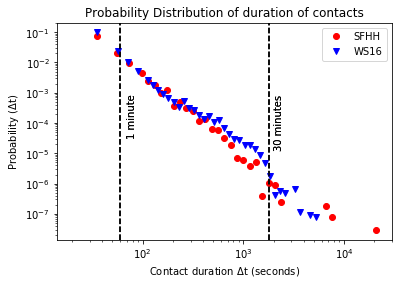

In [9]:
from face2face.visualization.plot_probability_distribution import plot_contact_duration
df_ws16 = Data("WS16")
contact_duration_x_y_ws16, delta_t_list = calculate_contact_duration(df_ws16)
color_list = ["red","blue"]
marker_list = ["o","v"]
label_list = ["SFHH","WS16"]
plot_contact_duration([contact_duration_x_y_sfhh,contact_duration_x_y_ws16], color_list, marker_list,label_list)

The plots in this tutorial are based on the visualization of the paper that is cited below: 

**Cattuto C, Van den Broeck W, Barrat A, Colizza V, Pinton JF, et al. (2010) Dynamics of Person-to-Person Interactions from Distributed RFID Sensor Networks. PLOS ONE 5(7): e11596. https://doi.org/10.1371/journal.pone.0011596**

The y-axis shows the probability for every possible contact duration of the dataset you used. The x-axis shows the related time intervals that occur in this datasets as possible contact durations. The plot shows that short contact durations are highly likely, while the probability decreases the longer the contact duration is. As you can see the probability decreases pretty much linear for contact durations between one minute and 30 minutes. The probability for contact durations which are longer than 30 minutes are pretty similar and pretty much unlikely.

# Calculating and Plotting the Distribution of the triangle duration <a name= "triangle_duration"></a>

As a next step we can analyze the duration of contacts between triangles.
The function's in- and output works pretty much the same like the one before

In [10]:
from face2face.statistics.distribution import calculate_triangle_duration
triangle_x_y_sfhh, delta_t_list = calculate_triangle_duration(df_sfhh)
triangle_x_y_ws16, delta_t_list = calculate_triangle_duration(df_ws16)

Plotting works the same way like before, you just have to import the "plot_triangle_duration"-function

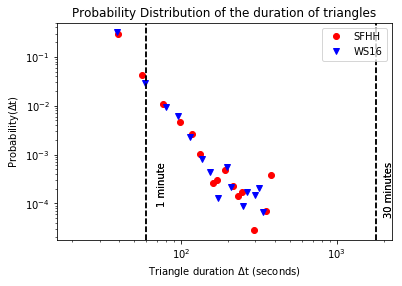

In [11]:
from face2face.visualization.plot_probability_distribution import plot_triangle_duration
plot_triangle_duration([triangle_x_y_sfhh,triangle_x_y_ws16], color_list, marker_list,label_list)

The plots in this tutorial are based on the visualization of the paper that is cited below: 

**Cattuto C, Van den Broeck W, Barrat A, Colizza V, Pinton JF, et al. (2010) Dynamics of Person-to-Person Interactions from Distributed RFID Sensor Networks. PLOS ONE 5(7): e11596. https://doi.org/10.1371/journal.pone.0011596**

In this plot the y-axis shows the probability for the contact duration of triangles, so in this case we focus on three people talking to each other at the same time. The x-axis shows the different occuring contact durations for the triangles in this datasets. The range of variation is a lot smaller than in the previous plot. Although you can see almost a linear distribution for both datasets. It seems like that for the WS16 dataset almost every triangle lasts for 20 seconds, because the probability is close to 1. The 20 seconds triangle duration in the SFHH dataset is a little bit smaller than the one from the WS16 dataset, so it looks like every other contact duration is likelier than the counterpart from WS16. Between the duration of 200 to 500 seconds you can see a lot of noise in the data and not a clear distribution.

# Calculating and Plotting the Distribution of the inter-contact duration<a name="inter-contact-duration"></a>

At last we can analyze the interval between the contact of person A and B and the contact between A and C.
This function works the same way as well.

In [12]:
from face2face.statistics.distribution import calculate_inter_contact_duration

intervall_x_y_sfhh, delta_t_list = calculate_inter_contact_duration(df_sfhh)
intervall_x_y_ws16, delta_t_list = calculate_inter_contact_duration(df_ws16)

For the plotting you need "plot_inter_contact_duration"-function this time

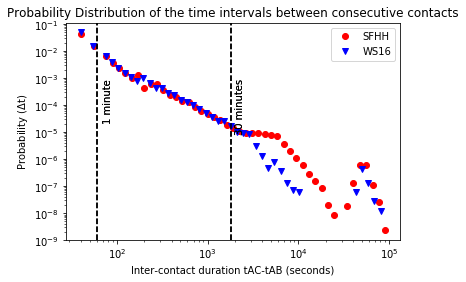

In [13]:
from face2face.visualization.plot_probability_distribution import plot_inter_contact_duration
plot_inter_contact_duration([intervall_x_y_sfhh,intervall_x_y_ws16], color_list, marker_list,label_list)

The plots in this tutorial are based on the visualization of the paper that is cited below: 

**Cattuto C, Van den Broeck W, Barrat A, Colizza V, Pinton JF, et al. (2010) Dynamics of Person-to-Person Interactions from Distributed RFID Sensor Networks. PLOS ONE 5(7): e11596. https://doi.org/10.1371/journal.pone.0011596**

The y-axis of this plot shows the probability for the inter-contact duration and the x-axis the related occuring durations. From the start until the mark of 30 minutes the decreasing probability by an increasing inter-contact duration is pretty linear. After the 30 minutes mark the plot/the probabilty decreases more before high fluctuations occur. The reason for this fluctuations could be that the WS16 conference took two days and the SFHH took 3 days, so if a person A talked to person B at day one and then talked to person C at day 2 long inter-contact durations results of this. And this inter-contact durations are highly likely, because every person who was there on two or more days and talked to different persons day 1 and the next time on day 2 would be part of this fluctuation.